# Differentially expressed gene analysis on boundaries

In [1]:
#load packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
#load data
seu_PR <- readRDS(file = "../../data/seurat_object/Set3/seu_lateralect_PR_ID.obj")

In [3]:
seu_PR

An object of class Seurat 
28745 features across 1717 samples within 2 assays 
Active assay: SCT (11239 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


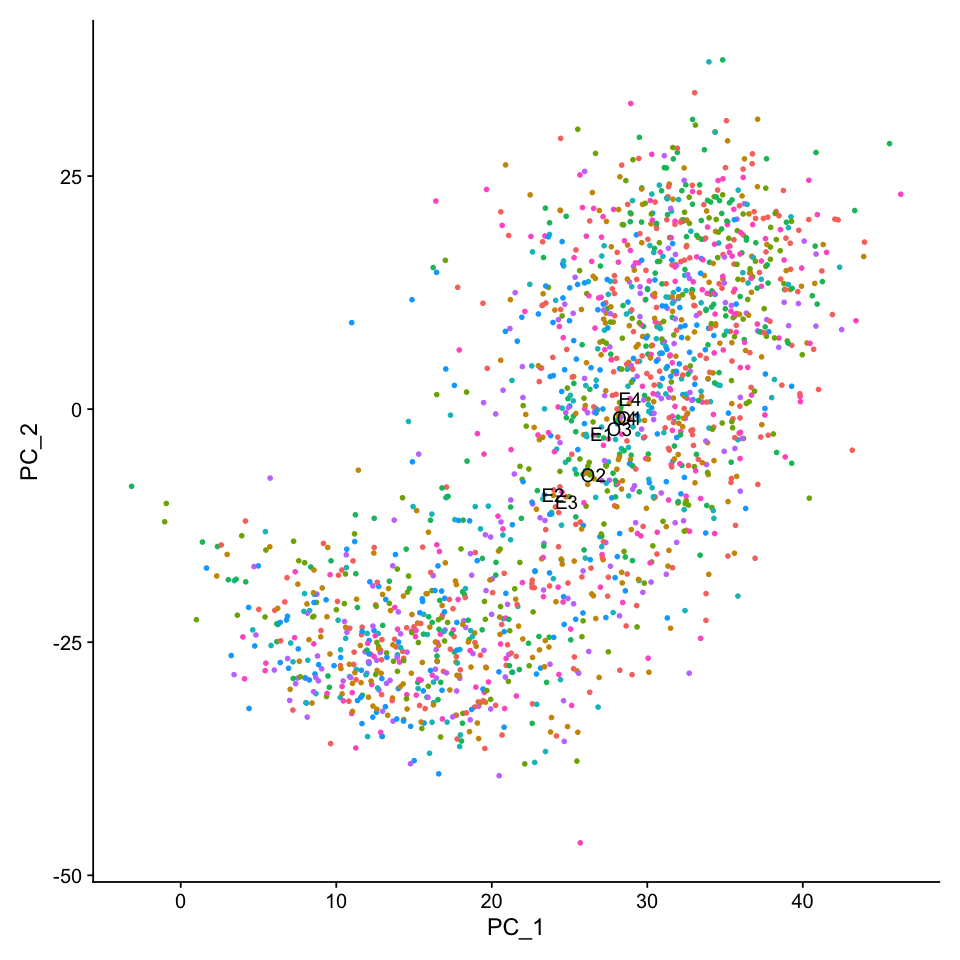

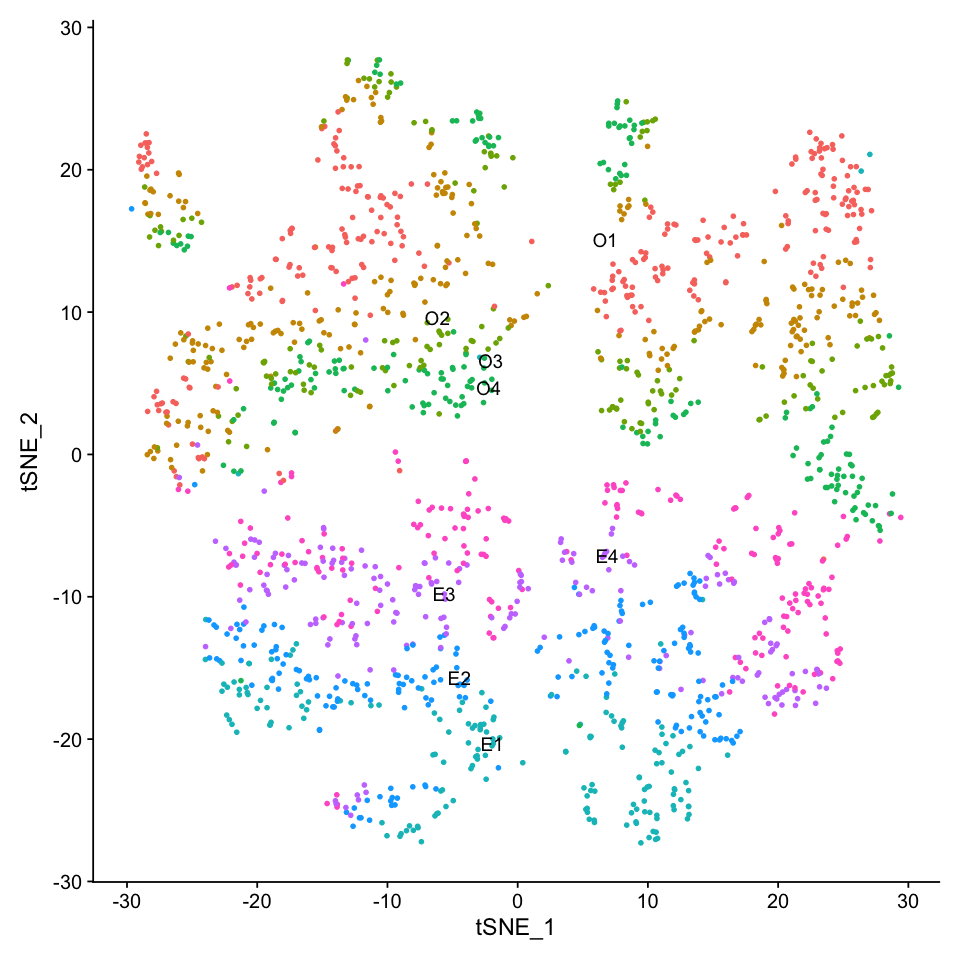

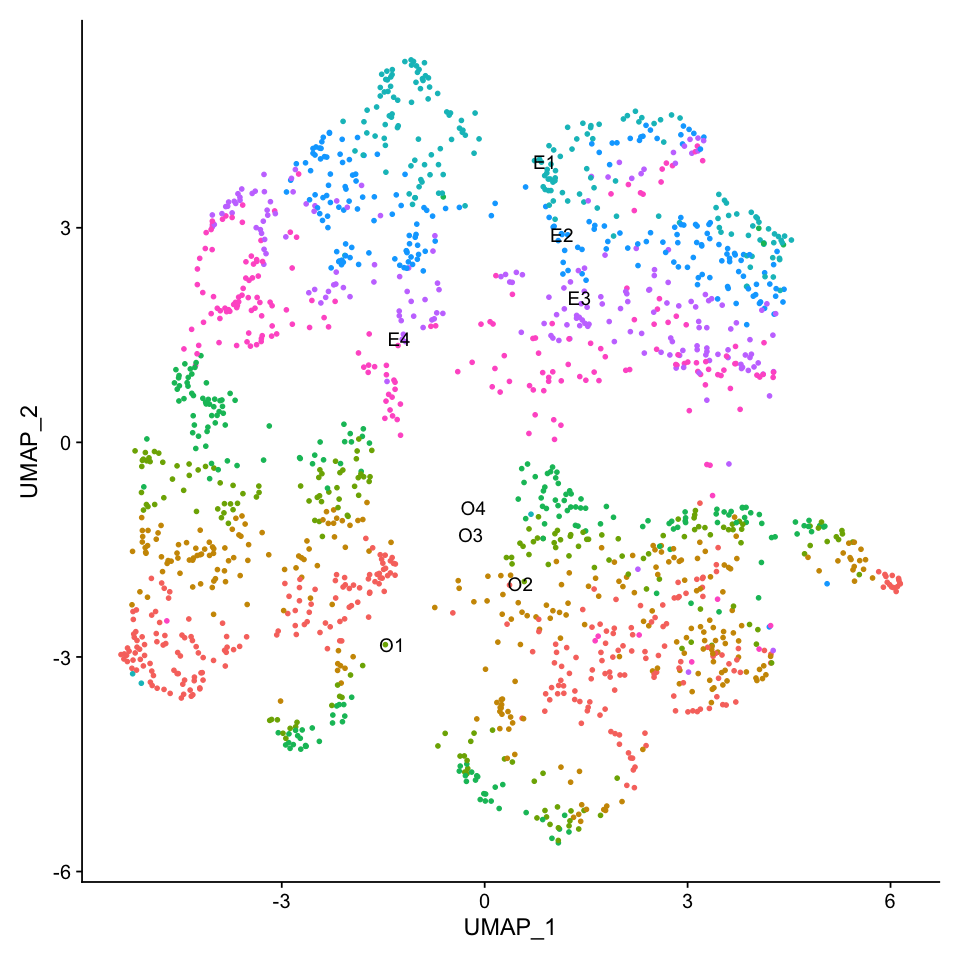

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
seu_PR <- RunPCA(seu_PR, verbose = FALSE)
seu_PR <- RunTSNE(seu_PR, dims = 1:30, verbose = FALSE)
seu_PR <- RunUMAP(seu_PR, dims = 1:30, verbose = FALSE)
DimPlot(seu_PR, reduction =  "pca", label = TRUE) + NoLegend()
DimPlot(seu_PR, reduction =  "tsne", label = TRUE) + NoLegend()
DimPlot(seu_PR, reduction =  "umap", label = TRUE) + NoLegend()

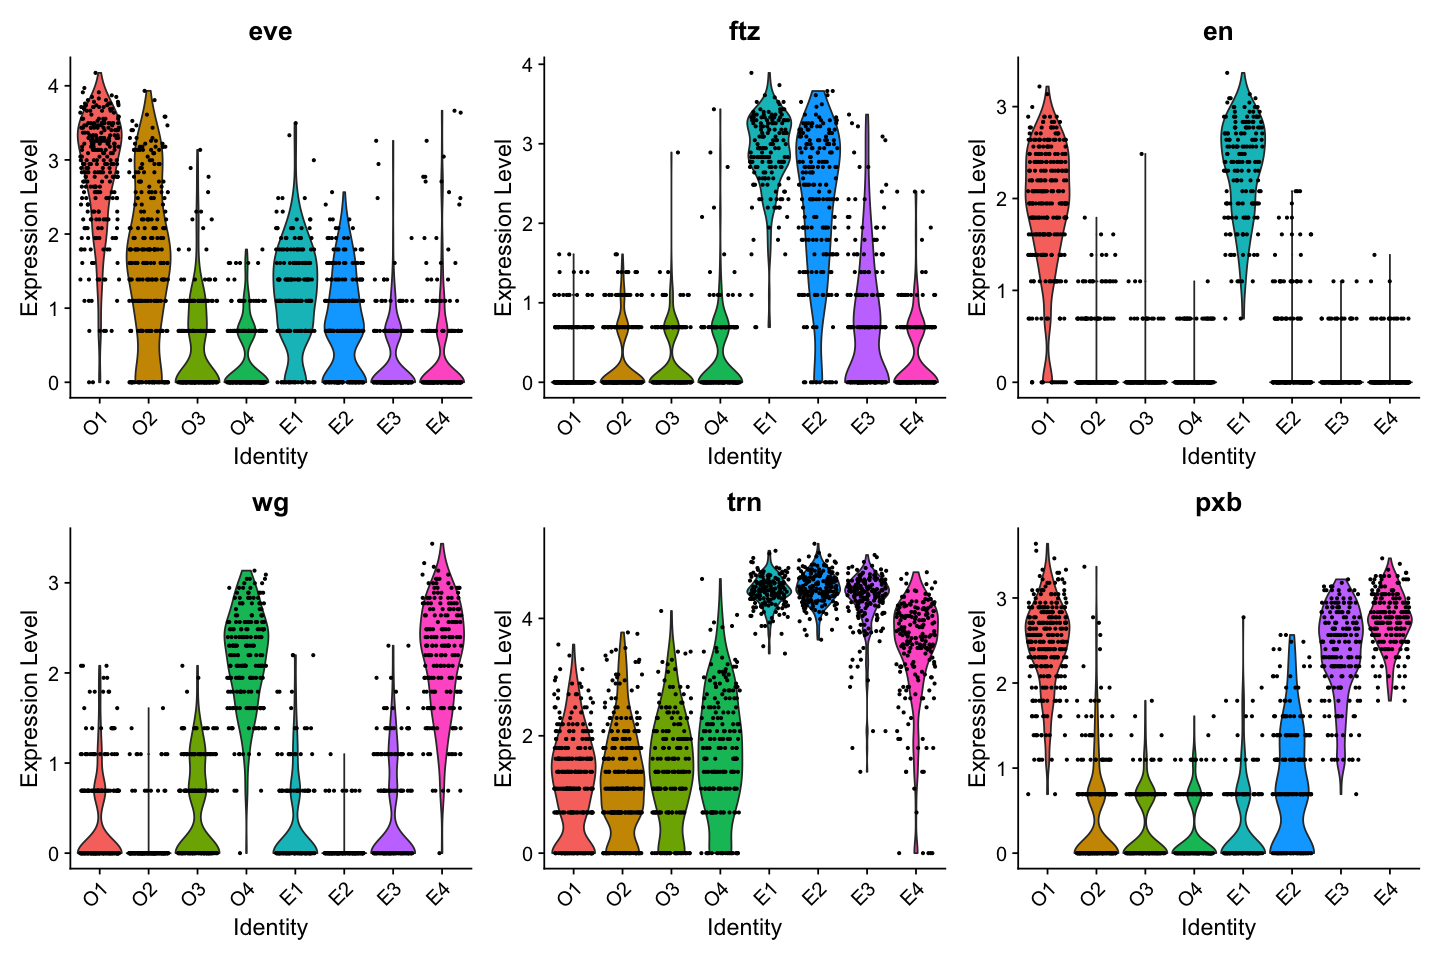

In [5]:
options(repr.plot.width=12, repr.plot.height=8)
VlnPlot(seu_PR, features = c("eve", "ftz", "en", "wg", "trn", "pxb"),  pt.size = 0.5) 

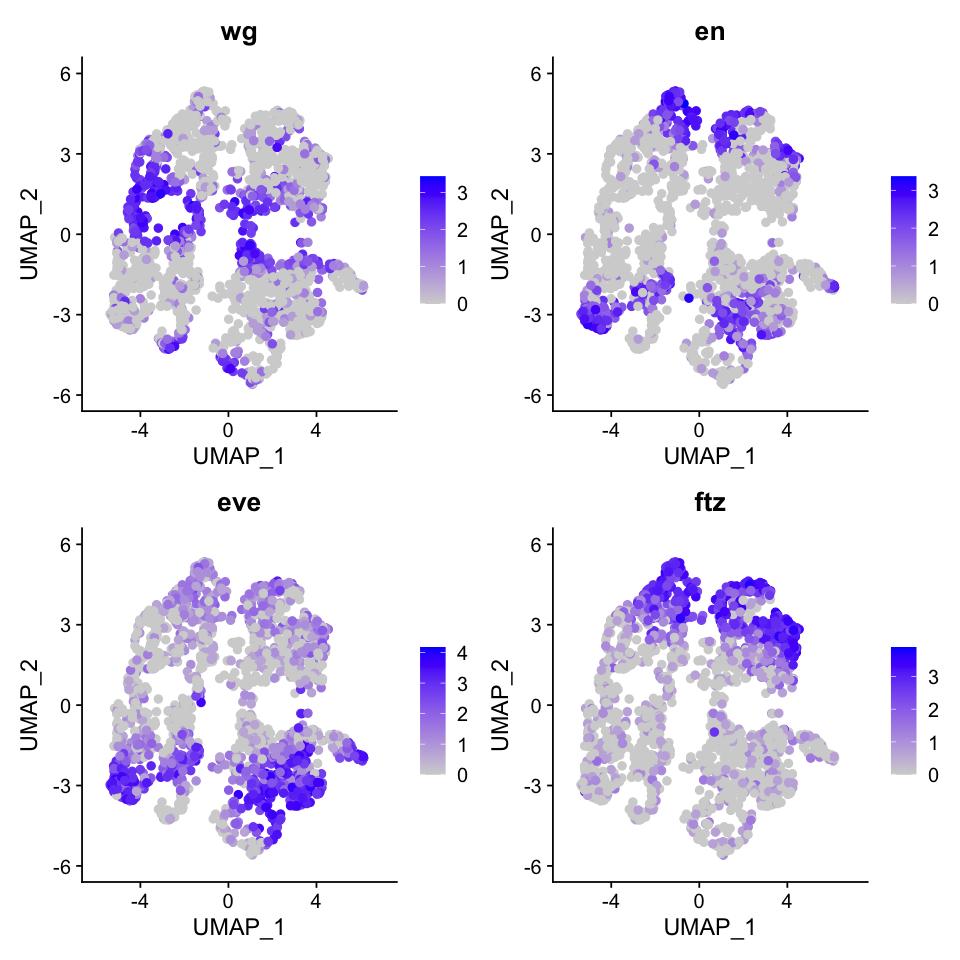

In [6]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_PR, reduction = "umap", features = c("wg", "en", "eve", "ftz"), pt.size = 2,  ncol = 2)

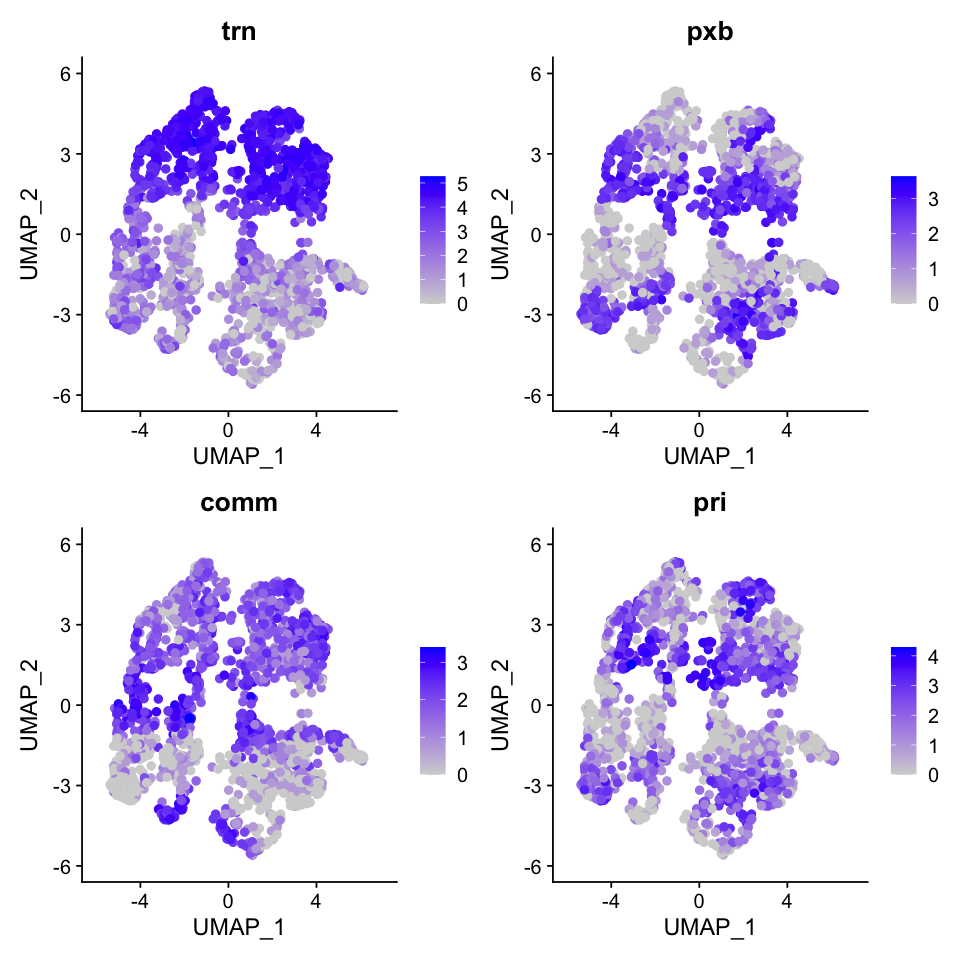

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_PR, reduction = "umap", features = c("trn", "pxb", "comm", "pri"), pt.size = 2,  ncol = 2)

## DEG analysis

In [8]:
Idents(seu_PR) <- "pairrule_ID"

In [9]:
levels <- c("O1","O2","O3","O4", "E1","E2","E3","E4")
levels(seu_PR) <- levels

In [10]:
seu_PR_VF3000 <- seu_PR[VariableFeatures(seu_PR), ]
seu_PR_VF3000

An object of class Seurat 
4000 features across 1717 samples within 2 assays 
Active assay: SCT (2000 features, 2000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, reumap, tsne

In [11]:
DE_O1vsO2_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "O1",
  ident.2 = "O2",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_O1vsO2_check$gene_name <- rownames(DE_O1vsO2_check)

DE_O2vsO3_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "O2",
  ident.2 = "O3",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_O2vsO3_check$gene_name <- rownames(DE_O2vsO3_check)

DE_O3vsO4_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "O2",
  ident.2 = "O3",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_O3vsO4_check$gene_name <- rownames(DE_O3vsO4_check)

DE_O4vsE1_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "O4",
  ident.2 = "E1",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_O4vsE1_check$gene_name <- rownames(DE_O4vsE1_check)

DE_E1vsE2_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "E1",
  ident.2 = "E2",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_E1vsE2_check$gene_name <- rownames(DE_E1vsE2_check)

DE_E2vsE3_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "E2",
  ident.2 = "E3",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_E2vsE3_check$gene_name <- rownames(DE_E2vsE3_check)

DE_E3vsE4_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "E3",
  ident.2 = "E4",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_E3vsE4_check$gene_name <- rownames(DE_E3vsE4_check)

DE_E4vsO1_check <- FindMarkers(
  seu_PR_VF3000,
  ident.1 = "E4",
  ident.2 = "O1",
#   logfc.threshold = log(2.0),
  test.use = "MAST",
  verbose = TRUE,
  only.pos = FALSE,
)
DE_E4vsO1_check$gene_name <- rownames(DE_E4vsO1_check)


 Completed [================================>-----------]  75% with 0 failures

 Completed [=================================>----------]  77% with 0 failures

 Completed [==================================>---------]  78% with 0 failures

 Completed [==================================>---------]  80% with 0 failures

 Completed [===================================>--------]  82% with 0 failures

 Completed [====================================>-------]  83% with 0 failures

 Completed [====================================>-------]  85% with 0 failures

 Completed [=====================================>------]  86% with 0 failures

 Completed [======================================>-----]  88% with 0 failures

 Completed [======================================>-----]  89% with 0 failures

 Completed [=======================================>----]  91% with 0 failures

 Completed [========================================>---]  92% with 0 failures

 Completed [===========================


 Completed [==================================>---------]  80% with 0 failures

 Completed [===================================>--------]  81% with 0 failures

 Completed [===================================>--------]  82% with 0 failures

 Completed [===================================>--------]  83% with 0 failures

 Completed [====================================>-------]  84% with 0 failures

 Completed [=====================================>------]  85% with 0 failures

 Completed [=====================================>------]  86% with 0 failures

 Completed [=====================================>------]  88% with 0 failures

 Completed [======================================>-----]  89% with 0 failures

 Completed [=======================================>----]  90% with 0 failures

 Completed [=======================================>----]  91% with 0 failures

 Completed [=======================================>----]  92% with 0 failures

 Completed [===========================


 Completed [======================>---------------------]  53% with 0 failures

 Completed [=======================>--------------------]  54% with 0 failures

 Completed [=======================>--------------------]  55% with 0 failures

 Completed [========================>-------------------]  57% with 0 failures

 Completed [========================>-------------------]  58% with 0 failures

 Completed [=========================>------------------]  59% with 0 failures

 Completed [==========================>-----------------]  61% with 0 failures

 Completed [==========================>-----------------]  62% with 0 failures

 Completed [===========================>----------------]  63% with 0 failures

 Completed [===========================>----------------]  64% with 0 failures

 Completed [============================>---------------]  66% with 0 failures

 Completed [=============================>--------------]  67% with 0 failures

 Completed [===========================

pdf 
  2

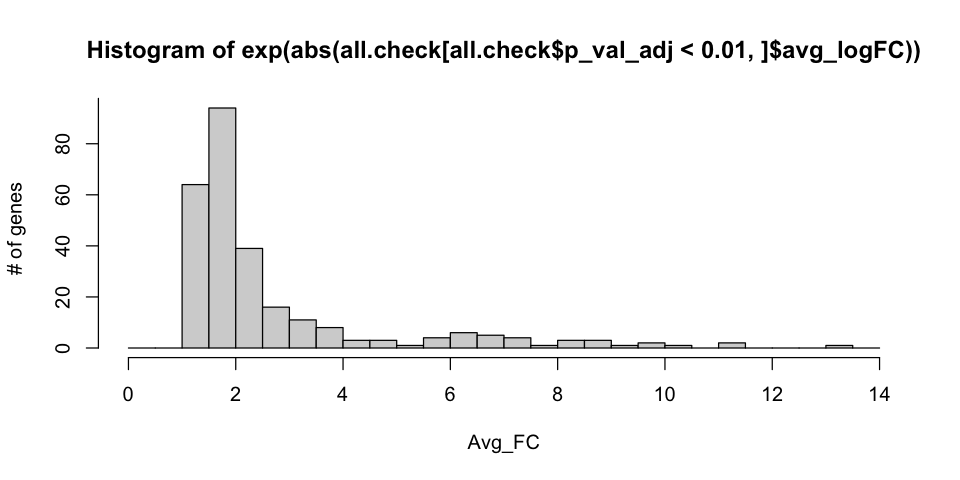

In [34]:
all.check <- rbind(DE_O1vsO2_check, DE_O2vsO3_check,DE_O3vsO4_check, DE_O4vsE1_check,
                  DE_E1vsE2_check,DE_E2vsE3_check,DE_E3vsE4_check, DE_E4vsO1_check)
options(repr.plot.width=8, repr.plot.height=4)
hist(exp(abs(all.check[all.check$p_val_adj<0.01,]$avg_logFC)), breaks = seq(0,28,1)/2,
     xlab = 'Avg_FC', ylab = '# of genes', yaxp =c(0,100,5))

postscript("./figures/FC_histgram.eps", width = 8, height = 4, pointsize = 6, horizontal = FALSE)
hist(exp(abs(all.check[all.check$p_val_adj<0.01,]$avg_logFC)), breaks = seq(0,28,1)/2,
     xlab = 'Avg_FC', ylab = '# of genes', yaxp =c(0,100,5))
dev.off()

Threshold is determined as Fold Change > 2.0

In [13]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          tibble_3.0.5               
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] data.table_1.13.6           magrittr_2.0.1